# Download climate data from ncep

In [12]:
import os
import xarray as xr
from pathlib import Path

# Create directory and ensure permissions
data_dir = Path("../pygis/data")
data_dir.mkdir(parents=True, exist_ok=True)

# Check if directory is writable
if not os.access(data_dir, os.W_OK):
    print(f"Directory not writable: {data_dir}")
    # Try current directory instead
    data_dir = Path(".")

os.chdir(data_dir)
print(f"Working directory: {os.getcwd()}")

# Try download again
!curl -O "https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc"
#uncomment for using in LINUX
#import xarray as xr

# Change to the directory (not the file)
#os.chdir(r"../pygis/data")

# Download the file using wget
#!wget "https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc"

Working directory: D:\JUPITER\JAPAN_MAY_JULY\All_envs\pyGIS-main\pyGIS-main\pygis\pygis\pygis\data


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 27.9M    0  143k    0     0   138k      0  0:03:27  0:00:01  0:03:26  138k
  1 27.9M    1  495k    0     0   247k      0  0:01:55  0:00:01  0:01:54  248k
  2 27.9M    2  847k    0     0   274k      0  0:01:44  0:00:03  0:01:41  274k
  3 27.9M    3 1103k    0     0   276k      0  0:01:43  0:00:03  0:01:40  276k
  5 27.9M    5 1519k    0     0   303k      0  0:01:34  0:00:05  0:01:29  303k
  6 27.9M    6 1855k    0     0   307k      0  0:01:33  0:00:06  0:01:27  342k
  7 27.9M    7 2287k    0     0   324k      0  0:01:28  0:00:07  0:01:21  354k
  9 27.9M    9 2783k    0     0   344k      0  0:01:23  0:00:08  0:01:15  387k
 11 27.9M   11 3279k    0     0   360k      0  0:01:19  0:00:09  0:01:10  425k
 13 27.9M   13 3791k    0     0   379k      0  0:01

# examine data structure

In [13]:
# open dataset
ds = xr.open_dataset('air.mon.mean.nc')
print(ds)

<xarray.Dataset> Size: 39MB
Dimensions:  (lat: 73, lon: 144, time: 929)
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-05-01
Data variables:
    air      (time, lat, lon) float32 39MB ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...


In [14]:
# view variable called air
print(ds.air)

<xarray.DataArray 'air' (time: 929, lat: 73, lon: 144)> Size: 39MB
[9765648 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-05-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    level_desc:    0.995 sigma
    actual_range:  [-73.78001  42.14595]


In [15]:
# look at time
print(ds.time)

<xarray.DataArray 'time' (time: 929)> Size: 7kB
array(['1948-01-01T00:00:00.000000000', '1948-02-01T00:00:00.000000000',
       '1948-03-01T00:00:00.000000000', ..., '2025-03-01T00:00:00.000000000',
       '2025-04-01T00:00:00.000000000', '2025-05-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-05-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-01 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [1297320. 1975200.]


# Select Data

In [16]:
# select a single year of air temp data
print(ds.air.sel(time='1948-01-01'))

<xarray.DataArray 'air' (lat: 73, lon: 144)> Size: 42kB
[10512 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 8B 1948-01-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    level_desc:    0.995 sigma
    actual_range:  [-73.78001  42.14595]


In [17]:
# select a time period of air data
print(ds.air.sel(time=slice("2000-06-01", "2000-06-10")))

<xarray.DataArray 'air' (time: 1, lat: 73, lon: 144)> Size: 42kB
[10512 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 8B 2000-06-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    level_desc:    0.995 sigma
    actual_range:  [-73.78001  42.14595]


In [18]:
# see all years
print(ds.time.dt.year.head(20))

<xarray.DataArray 'year' (time: 20)> Size: 160B
array([1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948, 1948,
       1948, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949], dtype=int64)
Coordinates:
  * time     (time) datetime64[ns] 160B 1948-01-01 1948-02-01 ... 1949-08-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-01 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [1297320. 1975200.]


In [19]:
# see all months
print(ds.time.dt.month.head(20))

<xarray.DataArray 'month' (time: 20)> Size: 160B
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8], dtype=int64)
Coordinates:
  * time     (time) datetime64[ns] 160B 1948-01-01 1948-02-01 ... 1949-08-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-01 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [1297320. 1975200.]


In [20]:
# select months jun, july
print(ds.time.sel(time=ds.time.dt.month.isin([6, 7])).head())

<xarray.DataArray 'time' (time: 5)> Size: 40B
array(['1948-06-01T00:00:00.000000000', '1948-07-01T00:00:00.000000000',
       '1949-06-01T00:00:00.000000000', '1949-07-01T00:00:00.000000000',
       '1950-06-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 40B 1948-06-01 1948-07-01 ... 1950-06-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-01 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [1297320. 1975200.]


In [21]:
# select months jun, july in two years
print(ds.time.sel(time=ds.time.dt.month.isin([6, 7]) & ds.time.dt.year.isin([1962,1973])))

<xarray.DataArray 'time' (time: 4)> Size: 32B
array(['1962-06-01T00:00:00.000000000', '1962-07-01T00:00:00.000000000',
       '1973-06-01T00:00:00.000000000', '1973-07-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 32B 1962-06-01 1962-07-01 ... 1973-07-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-01 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [1297320. 1975200.]


# Summarize by year month etc with groupby


<xarray.Dataset> Size: 3MB
Dimensions:  (year: 78, lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year     (year) int64 624B 1948 1949 1950 1951 1952 ... 2022 2023 2024 2025
Data variables:
    air      (year, lat, lon) float32 3MB -17.98 -17.98 -17.98 ... -40.61 -40.61
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...


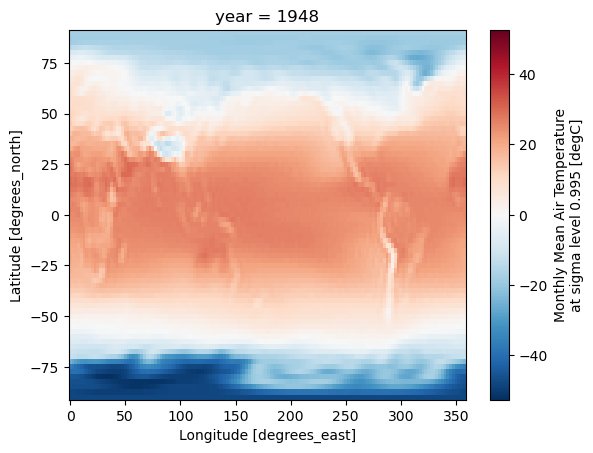

In [22]:
# get mean air temp across all years and then plot 
year_mean = ds.groupby('time.year').mean(dim='time')
print(year_mean)
year_mean.air.sel(year=1948).plot()

<xarray.Dataset> Size: 506kB
Dimensions:  (month: 12, lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 505kB -29.66 -29.66 ... -22.17 -22.17
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...


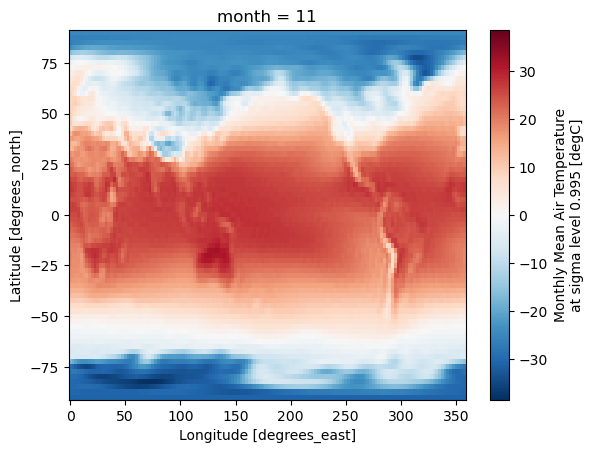

In [23]:
# get mean air temp across all months and then plot 
year_mean = ds.groupby('time.month').mean(dim='time')
print(year_mean)
year_mean.air.sel(month=11).plot()

# Calculate Anomolies 

<xarray.Dataset> Size: 3MB
Dimensions:  (lat: 73, lon: 144, year: 78)
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year     (year) int64 624B 1948 1949 1950 1951 1952 ... 2022 2023 2024 2025
Data variables:
    air      (year, lat, lon) float32 3MB -0.02024 -0.02024 ... 6.474 6.474


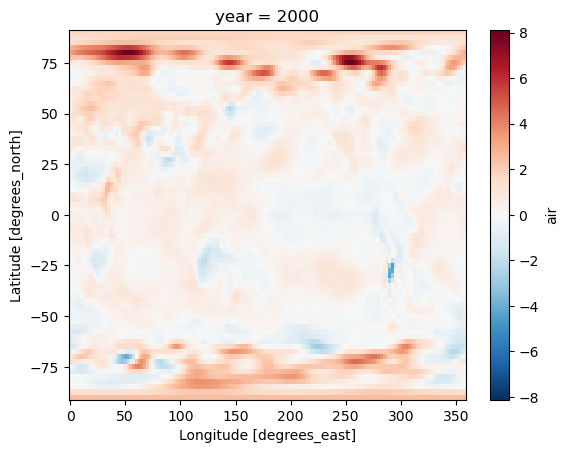

In [24]:
# calculate annual difference from base period
base_year_mn = ds.sel(time=slice("1948-01-01", "1978-01-01")).mean(dim='time')
base_year_anom = ds.groupby('time.year').mean(dim='time') - base_year_mn
print(base_year_anom)
base_year_anom.air.sel(year=2000).plot()

<xarray.Dataset> Size: 39MB
Dimensions:  (lat: 73, lon: 144, time: 929)
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-05-01
    month    (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 11 ... 8 9 10 11 12 1 2 3 4 5
Data variables:
    air      (time, lat, lon) float32 39MB -5.267 -5.267 -5.267 ... 1.98 1.98


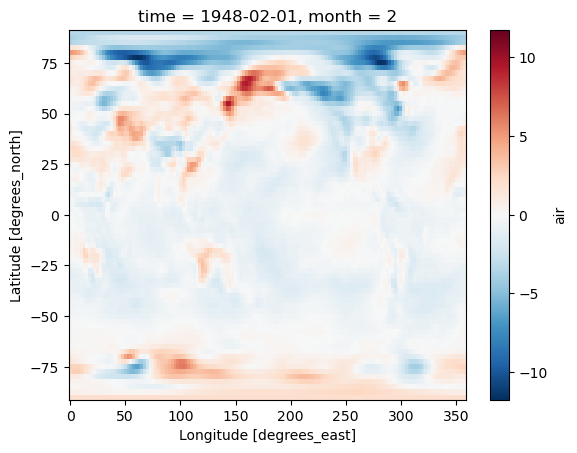

In [25]:
# calculate annual difference from base period
base_month_mn = ds.groupby('time.month').mean(dim='time')
base_month_anom = ds.groupby('time.month') - base_month_mn
print(base_month_anom)
base_month_anom.air[1].plot()

# Rolling Averages

In [26]:
print(ds.rolling(time=5).mean())

<xarray.Dataset> Size: 39MB
Dimensions:  (lat: 73, lon: 144, time: 929)
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-05-01
Data variables:
    air      (time, lat, lon) float32 39MB nan nan nan ... -40.61 -40.61 -40.61
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...


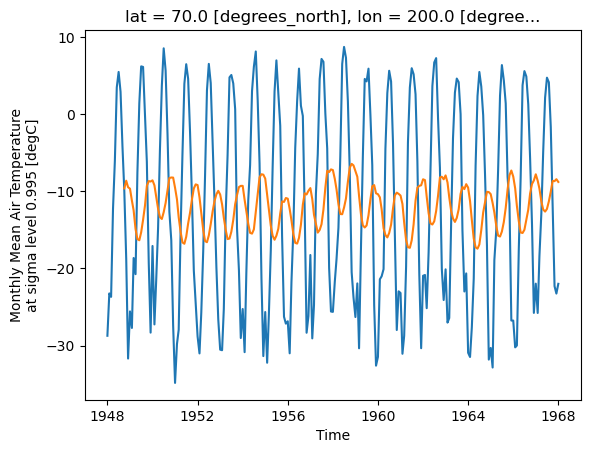

In [27]:
# lets see what we are doing by selecting data for one coordinate
air_ts = ds.air.sel(lon=200, lat=70,time=slice("1948-01-01", "1968-01-01"))
air_rolling_mn = air_ts.rolling(time=10).mean()

air_ts.plot()
air_rolling_mn.plot()

In [28]:
# looking at the data the 10th period holds mean of preceeding 10 years
print(air_rolling_mn)

<xarray.DataArray 'air' (time: 241)> Size: 964B
array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,  -9.597281 ,
        -8.600037 ,  -9.446183 ,  -9.634957 , -11.183691 , -12.446303 ,
       -14.87247  , -16.181953 , -16.331898 , -15.295164 , -13.68239  ,
       -11.829989 ,  -9.274764 ,  -8.647032 ,  -8.707742 ,  -8.551483 ,
        -9.204096 , -10.612224 , -12.233524 , -13.323975 , -13.569265 ,
       -12.686234 , -11.500299 ,  -9.828165 ,  -8.25694  ,  -8.183561 ,
        -8.195834 ,  -9.516416 , -11.02067  , -13.350184 , -15.23865  ,
       -16.614681 , -16.78749  , -15.877482 , -14.152644 , -12.751311 ,
       -11.067377 ,  -9.608103 ,  -9.078544 ,  -9.165285 , -10.751544 ,
       -12.808609 , -14.98891  , -16.439297 , -16.587517 , -15.697615 ,
       -14.2351   , -12.579634 , -11.251148 , -10.358339 ,  -9.914839 ,
       -10.3947115, -11.674663 , -13.401921 , -14.996056 , -16.183313 ,
       -16.10931

# Write Back to File

In [29]:
ds.rolling(time=5).mean().to_netcdf('./air_5yr_rolling.nc')